# Start with a simple autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# x_train=np.expand_dims(x_train, 3)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

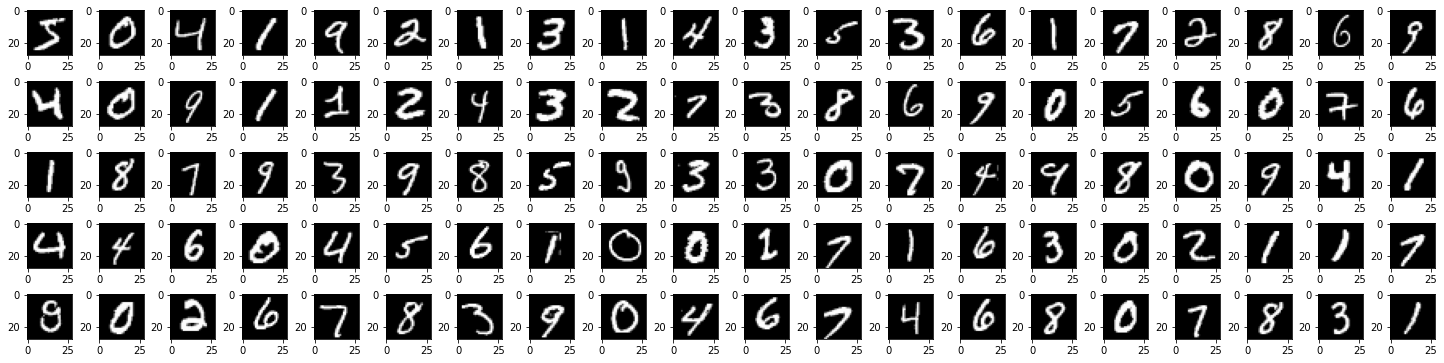

In [ ]:
rows, cols = 5, 20
fig, axs = plt.subplots(rows, cols, figsize = (20, 5))
for i in range(rows):
    for j in range(cols):
        axs[i][j].imshow(x_train[cols*i + j], cmap="gray")
fig.tight_layout(pad=0.5)
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.astype("float32")/255.0

In [ ]:
encoder_input=Input((28, 28, 1))

x=Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(encoder_input)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

encoder_output=Dense(2)(x)

encoder=Model(encoder_input, encoder_output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0     

In [ ]:
decoder_input=Input(shape=(2,))

x=Dense(7*7*64)(decoder_input)
x=Reshape((7, 7, 64))(x)

x=Conv2DTranspose(64, 3, 1, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(64, 3, 2, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(32, 3, 2, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(1, 3, 1, padding="same")(x)
decoder_output=Activation("sigmoid")(x)

decoder=Model(decoder_input, decoder_output)

In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0   

In [ ]:
simple_ae=Model(encoder_input, decoder(encoder_output))

In [ ]:
opt=Adam(learning_rate=0.0005)
def rmse(y_true, y_pred): #root mean squared error
    return K.mean(K.square(y_true - y_pred), axis=[-3, -2, -1])
simple_ae.compile(optimizer=opt, loss=rmse)

In [ ]:
simple_ae.fit(x_train[:1000], x_train[:1000], batch_size=32, epochs=100, shuffle=True)

Epoch 1/100
32/32 [==============================] - 5s 109ms/step - loss: 0.1359
Epoch 2/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0669
Epoch 3/100
32/32 [==============================] - 4s 110ms/step - loss: 0.0616
Epoch 4/100
32/32 [==============================] - 4s 109ms/step - loss: 0.0585
Epoch 5/100
32/32 [==============================] - 4s 109ms/step - loss: 0.0571
Epoch 6/100
32/32 [==============================] - 4s 109ms/step - loss: 0.0563
Epoch 7/100
32/32 [==============================] - 3s 109ms/step - loss: 0.0554
Epoch 8/100
32/32 [==============================] - 4s 110ms/step - loss: 0.0547
Epoch 9/100
32/32 [==============================] - 4s 110ms/step - loss: 0.0542
Epoch 10/100
32/32 [==============================] - 4s 110ms/step - loss: 0.0537
Epoch 11/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0531
Epoch 12/100
32/32 [==============================] - 4s 110ms/step - loss: 0.0528
Epoch 13/100


In [ ]:
encoded_plots=encoder.predict(x_train[:100])

In [ ]:
encoded_plots.shape

(100, 2)

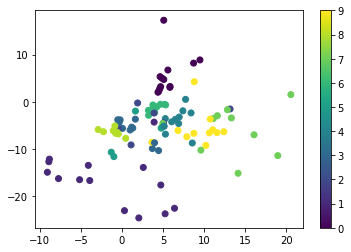

In [ ]:
plt.scatter(encoded_plots[:, 0], encoded_plots[:, 1], c=y_train[:100])
plt.colorbar()
plt.show()

In [ ]:
new_num=decoder.predict(np.array([[5.0, 0.0]]))

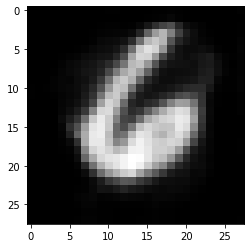

In [ ]:
plt.imshow(new_num[0, :, :, 0], cmap="gray")

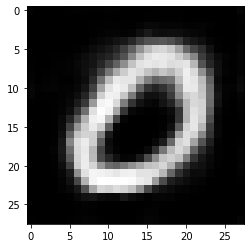

In [ ]:
new_num=decoder.predict(np.array([[5.0, 5.0]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")

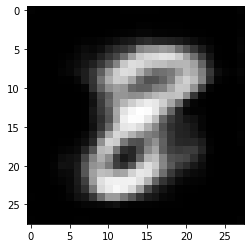

In [ ]:
new_num=decoder.predict(np.array([[-1.0, -6.0]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")

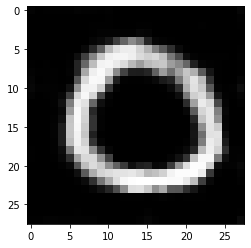

In [ ]:
new_num=decoder.predict(np.array([[7.5, 15.0]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")

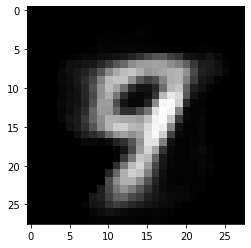

In [ ]:
new_num=decoder.predict(np.array([[10.0, -5.0]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")

# Now, VAE(Variational Autoencoder), surprise me!

In [ ]:
Vencoder_input=Input((28, 28, 1))

x=Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(Vencoder_input)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

mu=Dense(2)(x)
log_var=Dense(2)(x)

Vencoder_output=Lambda(lambda x: x[0]+K.exp(x[1]/2)*K.random_normal(K.shape(x[0])))([mu, log_var])

Vencoder=Model(Vencoder_input, Vencoder_output)

In [ ]:
#the same structure with that of simple ae
Vdecoder_input=Input(shape=(2,))

x=Dense(7*7*64)(Vdecoder_input)
x=Reshape((7, 7, 64))(x)

x=Conv2DTranspose(64, 3, 1, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(64, 3, 2, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(32, 3, 2, padding="same")(x)
x=LeakyReLU()(x)

x=Conv2DTranspose(1, 3, 1, padding="same")(x)
Vdecoder_output=Activation("sigmoid")(x)

Vdecoder=Model(Vdecoder_input, Vdecoder_output)

In [ ]:
vae=Model(Vencoder_input, Vdecoder(Vencoder_output))

In [ ]:
vae.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 32)   128         conv2d_4[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_7 (LeakyReLU)       (None, 28, 28, 32)   0           batch_normalization_4[0][0]      
____________________________________________________________________________________________

In [ ]:
vae_rmse=K.mean(K.square(Vdecoder(Vencoder_output) - Vencoder_input), axis=[-3, -2, -1])
vae_kl_loss=-0.5*K.sum(1+log_var-K.square(mu)-K.exp(log_var), axis=-1)
vae_loss=(1000*vae_rmse+vae_kl_loss)/1000
vae.add_loss(vae_loss)
opt=Adam(learning_rate=0.0005)
vae.compile(opt)

In [ ]:
# opt=Adam(learning_rate=0.0005)
# def vae_rmse(y_true, y_pred): #root mean squared error
#     return K.mean(K.square(y_true - y_pred), axis=[-3, -2, -1])
# def vae_kl_loss(y_true, y_pred):
#     return -0.5*K.sum(1+log_var-K.square(mu)-K.exp(log_var), axis=-1)
# def vae_loss(y_true, y_pred):
#     return vae_rmse(y_true, y_pred)+vae_kl_loss(y_true, y_pred)
# vae.compile(optimizer=opt, loss=vae_loss)

In [ ]:
vae.fit(x_train[:1000], x_train[:1000], batch_size=32, epochs=50, shuffle=True)

Epoch 1/50
32/32 [==============================] - 5s 126ms/step - loss: 0.1823
Epoch 2/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0742
Epoch 3/50
32/32 [==============================] - 4s 130ms/step - loss: 0.0648
Epoch 4/50
32/32 [==============================] - 4s 129ms/step - loss: 0.0624
Epoch 5/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0605
Epoch 6/50
32/32 [==============================] - 4s 125ms/step - loss: 0.0589
Epoch 7/50
32/32 [==============================] - 4s 129ms/step - loss: 0.0581
Epoch 8/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0575
Epoch 9/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0572
Epoch 10/50
32/32 [==============================] - 4s 129ms/step - loss: 0.0570
Epoch 11/50
32/32 [==============================] - 4s 130ms/step - loss: 0.0564
Epoch 12/50
32/32 [==============================] - 4s 129ms/step - loss: 0.0560
Epoch 13/50
32/32 [======

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
mu

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_7')>

In [ ]:
x

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_transpose_11')>

In [ ]:
encoded_plots=Vencoder.predict(x_train[:100])

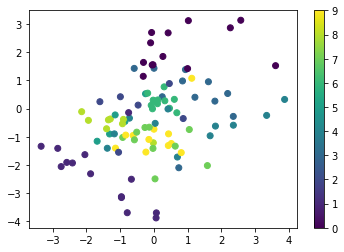

In [ ]:
plt.scatter(encoded_plots[:, 0], encoded_plots[:, 1], c=y_train[:100])
plt.colorbar()
plt.show()

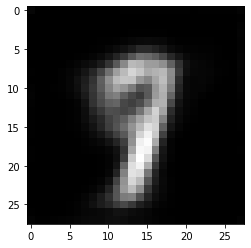

In [ ]:
new_num=Vdecoder.predict(np.array([[0.0, -1.4]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")

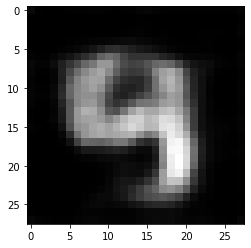

In [ ]:
new_num=Vdecoder.predict(np.array([[2.3, -0.3]]))
plt.imshow(new_num[0, :, :, 0], cmap="gray")